<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/25_Day_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('/content/titanic.csv' , usecols=['Survived','Pclass','Age','Fare'])

In [17]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


<Axes: xlabel='Age', ylabel='Density'>

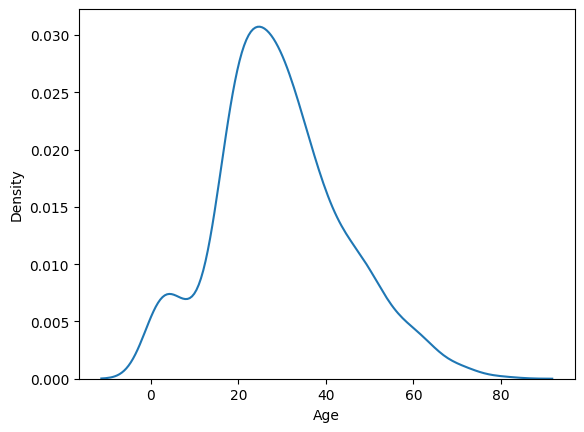

In [18]:
sns.kdeplot(df['Age'])


<Axes: xlabel='Fare', ylabel='Density'>

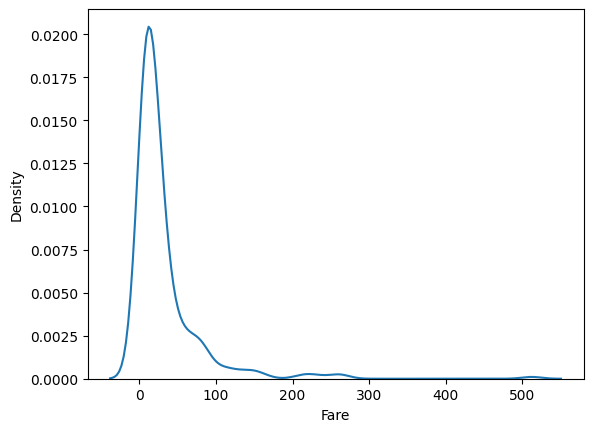

In [19]:
sns.kdeplot(df['Fare'])

<Axes: xlabel='Fare', ylabel='Age'>

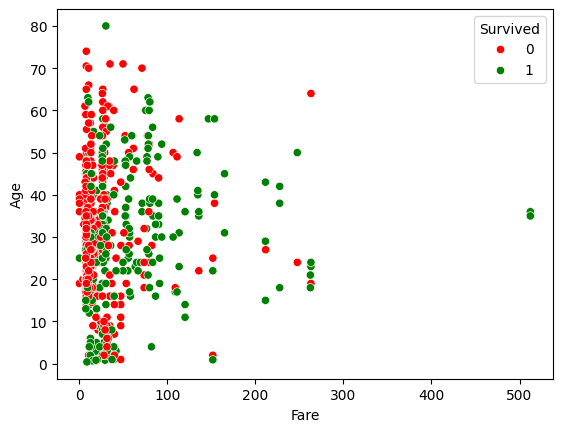

In [20]:
color_dict={1:'green',0:'red'}
sns.scatterplot(x='Fare',y='Age',hue='Survived',data=df, palette=color_dict)

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df.drop('Survived',axis=1),
                                      df['Survived'])

X_train.shape , X_test.shape

((668, 3), (223, 3))

In [22]:
from sklearn.preprocessing import MinMaxScaler

# fit to training data

scaler=MinMaxScaler()
scaler.fit(X_train)

# transform both data

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [23]:
# convert numpy array into dataframe
X_train_scaled=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_transformed,columns=X_test.columns)

In [24]:
np.round(X_train.describe() , 1)

,Pclass,Age,Fare
count,668.0,535.0,668.0
mean,2.3,29.2,30.8
std,0.8,14.3,46.6
min,1.0,0.4,0.0
25%,2.0,20.2,7.9
50%,3.0,28.0,14.4
75%,3.0,38.0,30.5
max,3.0,74.0,512.3


In [25]:
np.round(X_train_scaled.describe() , 1)

,Pclass,Age,Fare
count,668.0,535.0,668.0
mean,0.7,0.4,0.1
std,0.4,0.2,0.1
min,0.0,0.0,0.0
25%,0.5,0.3,0.0
50%,1.0,0.4,0.0
75%,1.0,0.5,0.1
max,1.0,1.0,1.0


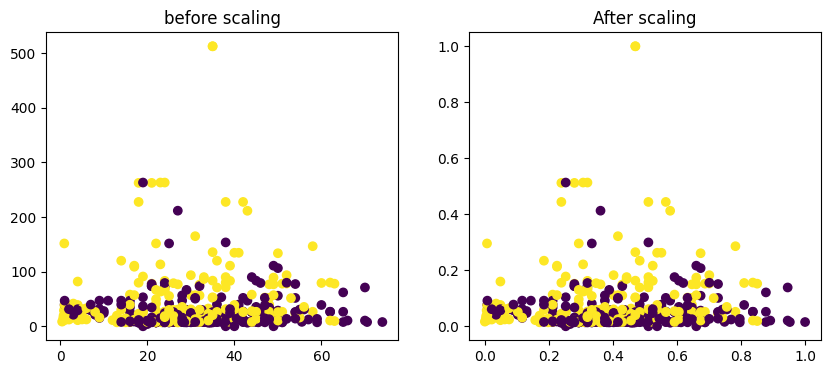

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2 , figsize=(10,4))

ax1.scatter(X_train['Age'] , X_train['Fare'] , c=y_train)
ax1.set_title('before scaling')

ax2.scatter(X_train_scaled['Age'] , X_train_scaled['Fare'] , c=y_train)
ax2.set_title('After scaling')


plt.show()

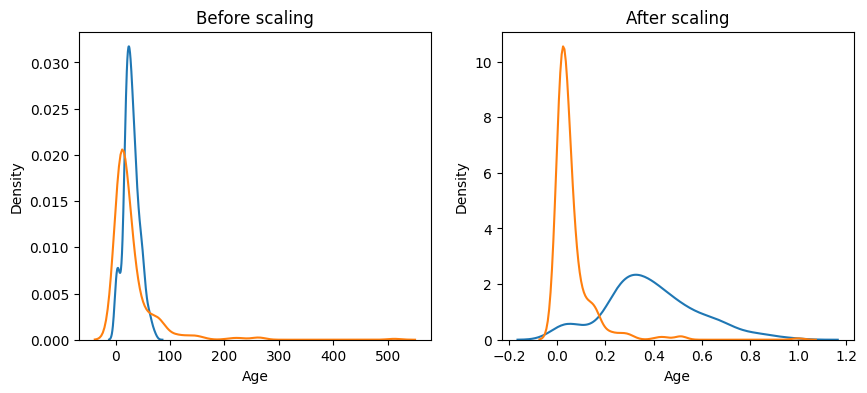

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2 , figsize=(10,4))

# before scaling

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'] , ax=ax1)
sns.kdeplot(X_train['Fare'] , ax=ax1)

# after scaling

ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'] , ax=ax2)
sns.kdeplot(X_train_scaled['Fare'] , ax=ax2)


plt.show()

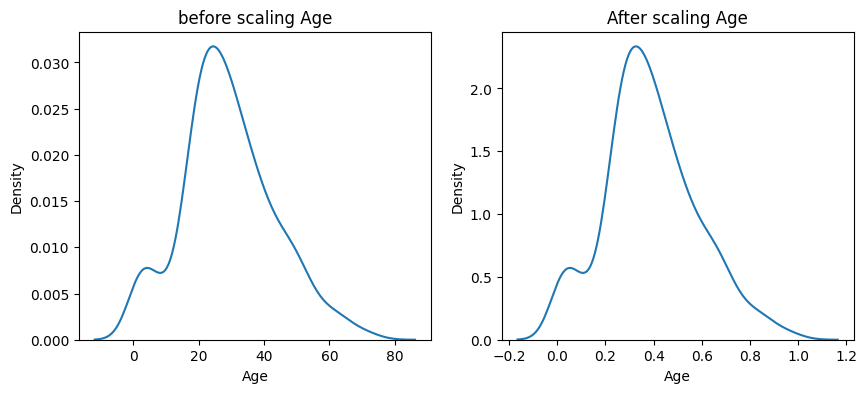

In [28]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(10,4))

# before scaling
ax1.set_title("before scaling Age")
sns.kdeplot(X_train['Age'] , ax=ax1)

# after scaling
ax2.set_title("After scaling Age")
sns.kdeplot(X_train_scaled['Age'] , ax=ax2)
plt.show()

In [29]:
# both look same

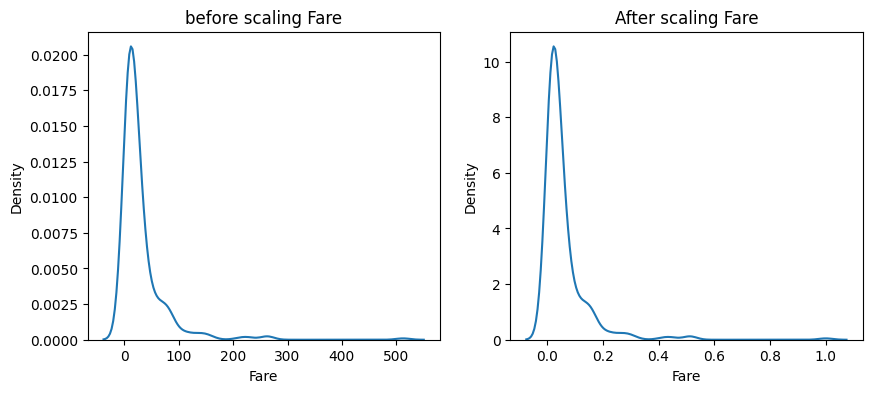

In [30]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(10,4))

# before scaling Fare
ax1.set_title("before scaling Fare")
sns.kdeplot(X_train['Fare'] , ax=ax1)

# after scaling  FAre
ax2.set_title("After scaling Fare")
sns.kdeplot(X_train_scaled['Fare'] , ax=ax2)
plt.show()